## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906
0:	learn: 0.9636947	total: 51.4ms	remaining: 51.3s
1:	learn: 0.9316233	total: 52ms	remaining: 26s
2:	learn: 0.9043065	total: 52.7ms	remaining: 17.5s
3:	learn: 0.8737262	total: 53.3ms	remaining: 13.3s
4:	learn: 0.8488143	total: 53.7ms	remaining: 10.7s
5:	learn: 0.8211767	total: 54.6ms	remaining: 9.05s
6:	learn: 0.7985961	total: 55.1ms	remaining: 7.81s
7:	learn: 0.7737659	total: 55.5ms	remaining: 6.88s
8:	learn: 0.7479279	total: 55.8ms	remaining: 6.14s
9:	learn: 0.7247736	total: 56.4ms	remaining: 5.58s
10:	learn: 0.7021257	total: 58.8ms	remaining: 5.28s
11:	learn: 0.6799539	total: 59ms	remaining: 4.86s
12:	learn: 0.6614400	total: 62ms	remaining: 4.7s
13:	learn: 0.6429270	total: 62.5ms	remaining: 4.41s
14:	learn: 0.6228520	total: 63.2ms	remaining: 4.15s
15:	learn: 0.6047089	total: 63.9ms	remaining: 3.93s
16:	learn: 0.5856312	total: 64.3ms	remaining: 3.72s
17:	learn: 0.5679092	total: 65.1ms	remaining: 3.55s
18:	learn: 0.5523565	total: 65.7ms	remaining: 3.39s
1

140:	learn: 0.0541499	total: 146ms	remaining: 888ms
141:	learn: 0.0538298	total: 146ms	remaining: 883ms
142:	learn: 0.0536030	total: 147ms	remaining: 883ms
143:	learn: 0.0532206	total: 148ms	remaining: 881ms
144:	learn: 0.0529041	total: 149ms	remaining: 878ms
145:	learn: 0.0526905	total: 150ms	remaining: 875ms
146:	learn: 0.0523492	total: 150ms	remaining: 871ms
147:	learn: 0.0520161	total: 151ms	remaining: 868ms
148:	learn: 0.0517937	total: 151ms	remaining: 863ms
149:	learn: 0.0514680	total: 152ms	remaining: 860ms
150:	learn: 0.0512862	total: 152ms	remaining: 855ms
151:	learn: 0.0509966	total: 153ms	remaining: 854ms
152:	learn: 0.0506813	total: 153ms	remaining: 850ms
153:	learn: 0.0505038	total: 154ms	remaining: 846ms
154:	learn: 0.0502547	total: 155ms	remaining: 843ms
155:	learn: 0.0499296	total: 155ms	remaining: 839ms
156:	learn: 0.0497037	total: 157ms	remaining: 843ms
157:	learn: 0.0494437	total: 157ms	remaining: 838ms
158:	learn: 0.0492497	total: 158ms	remaining: 834ms
159:	learn: 

319:	learn: 0.0296424	total: 302ms	remaining: 641ms
320:	learn: 0.0295563	total: 304ms	remaining: 643ms
321:	learn: 0.0294942	total: 306ms	remaining: 644ms
322:	learn: 0.0294374	total: 307ms	remaining: 644ms
323:	learn: 0.0293576	total: 309ms	remaining: 644ms
324:	learn: 0.0292845	total: 310ms	remaining: 643ms
325:	learn: 0.0292153	total: 310ms	remaining: 642ms
326:	learn: 0.0291612	total: 311ms	remaining: 641ms
327:	learn: 0.0290838	total: 312ms	remaining: 639ms
328:	learn: 0.0290363	total: 313ms	remaining: 637ms
329:	learn: 0.0289615	total: 313ms	remaining: 636ms
330:	learn: 0.0289279	total: 315ms	remaining: 638ms
331:	learn: 0.0288750	total: 316ms	remaining: 636ms
332:	learn: 0.0288105	total: 316ms	remaining: 633ms
333:	learn: 0.0287329	total: 318ms	remaining: 633ms
334:	learn: 0.0286707	total: 319ms	remaining: 634ms
335:	learn: 0.0286258	total: 321ms	remaining: 635ms
336:	learn: 0.0285675	total: 322ms	remaining: 633ms
337:	learn: 0.0285122	total: 323ms	remaining: 632ms
338:	learn: 

540:	learn: 0.0212187	total: 443ms	remaining: 376ms
541:	learn: 0.0211869	total: 444ms	remaining: 375ms
542:	learn: 0.0211615	total: 445ms	remaining: 374ms
543:	learn: 0.0211517	total: 445ms	remaining: 373ms
544:	learn: 0.0211215	total: 446ms	remaining: 372ms
545:	learn: 0.0210935	total: 447ms	remaining: 372ms
546:	learn: 0.0210779	total: 449ms	remaining: 371ms
547:	learn: 0.0210433	total: 449ms	remaining: 370ms
548:	learn: 0.0210311	total: 450ms	remaining: 369ms
549:	learn: 0.0210235	total: 450ms	remaining: 368ms
550:	learn: 0.0210031	total: 450ms	remaining: 367ms
551:	learn: 0.0209967	total: 451ms	remaining: 366ms
552:	learn: 0.0209818	total: 452ms	remaining: 365ms
553:	learn: 0.0209567	total: 453ms	remaining: 365ms
554:	learn: 0.0209486	total: 454ms	remaining: 364ms
555:	learn: 0.0209397	total: 455ms	remaining: 363ms
556:	learn: 0.0209056	total: 455ms	remaining: 362ms
557:	learn: 0.0208843	total: 456ms	remaining: 362ms
558:	learn: 0.0208779	total: 458ms	remaining: 362ms
559:	learn: 

692:	learn: 0.0182112	total: 571ms	remaining: 253ms
693:	learn: 0.0181868	total: 576ms	remaining: 254ms
694:	learn: 0.0181631	total: 577ms	remaining: 253ms
695:	learn: 0.0181565	total: 578ms	remaining: 252ms
696:	learn: 0.0181442	total: 579ms	remaining: 252ms
697:	learn: 0.0181214	total: 581ms	remaining: 251ms
698:	learn: 0.0180980	total: 584ms	remaining: 251ms
699:	learn: 0.0180761	total: 585ms	remaining: 251ms
700:	learn: 0.0180719	total: 587ms	remaining: 250ms
701:	learn: 0.0180666	total: 590ms	remaining: 250ms
702:	learn: 0.0180486	total: 594ms	remaining: 251ms
703:	learn: 0.0180367	total: 595ms	remaining: 250ms
704:	learn: 0.0180281	total: 607ms	remaining: 254ms
705:	learn: 0.0180231	total: 607ms	remaining: 253ms
706:	learn: 0.0180017	total: 609ms	remaining: 252ms
707:	learn: 0.0179811	total: 610ms	remaining: 251ms
708:	learn: 0.0179635	total: 610ms	remaining: 250ms
709:	learn: 0.0179575	total: 611ms	remaining: 249ms
710:	learn: 0.0179380	total: 612ms	remaining: 249ms
711:	learn: 

748:	learn: 0.0173787	total: 687ms	remaining: 230ms
749:	learn: 0.0173647	total: 687ms	remaining: 229ms
750:	learn: 0.0173431	total: 688ms	remaining: 228ms
751:	learn: 0.0173382	total: 688ms	remaining: 227ms
752:	learn: 0.0173182	total: 691ms	remaining: 227ms
753:	learn: 0.0173145	total: 692ms	remaining: 226ms
754:	learn: 0.0173057	total: 694ms	remaining: 225ms
755:	learn: 0.0172860	total: 694ms	remaining: 224ms
756:	learn: 0.0172573	total: 697ms	remaining: 224ms
757:	learn: 0.0172401	total: 697ms	remaining: 223ms
758:	learn: 0.0172184	total: 698ms	remaining: 221ms
759:	learn: 0.0172108	total: 698ms	remaining: 220ms
760:	learn: 0.0171834	total: 699ms	remaining: 220ms
761:	learn: 0.0171760	total: 700ms	remaining: 219ms
762:	learn: 0.0171594	total: 701ms	remaining: 218ms
763:	learn: 0.0171403	total: 702ms	remaining: 217ms
764:	learn: 0.0171331	total: 703ms	remaining: 216ms
765:	learn: 0.0171116	total: 704ms	remaining: 215ms
766:	learn: 0.0170963	total: 704ms	remaining: 214ms
767:	learn: 

906:	learn: 0.0151454	total: 834ms	remaining: 85.5ms
907:	learn: 0.0151351	total: 836ms	remaining: 84.7ms
908:	learn: 0.0151211	total: 837ms	remaining: 83.8ms
909:	learn: 0.0151112	total: 838ms	remaining: 82.9ms
910:	learn: 0.0151082	total: 839ms	remaining: 82ms
911:	learn: 0.0150977	total: 841ms	remaining: 81.1ms
912:	learn: 0.0150931	total: 841ms	remaining: 80.2ms
913:	learn: 0.0150819	total: 842ms	remaining: 79.2ms
914:	learn: 0.0150717	total: 842ms	remaining: 78.2ms
915:	learn: 0.0150635	total: 843ms	remaining: 77.3ms
916:	learn: 0.0150423	total: 843ms	remaining: 76.3ms
917:	learn: 0.0150312	total: 844ms	remaining: 75.4ms
918:	learn: 0.0150207	total: 844ms	remaining: 74.4ms
919:	learn: 0.0150134	total: 845ms	remaining: 73.4ms
920:	learn: 0.0149959	total: 845ms	remaining: 72.5ms
921:	learn: 0.0149828	total: 846ms	remaining: 71.6ms
922:	learn: 0.0149669	total: 846ms	remaining: 70.6ms
923:	learn: 0.0149569	total: 846ms	remaining: 69.6ms
924:	learn: 0.0149466	total: 847ms	remaining: 68

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.01956700276445652
ABC Pre-generator MAE 0.0790317348125103


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

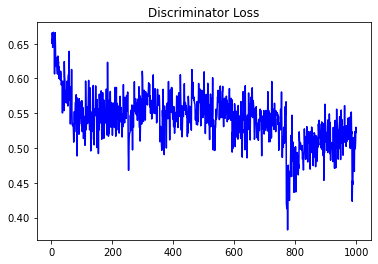

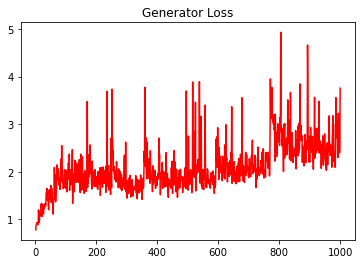

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.08051931148781985


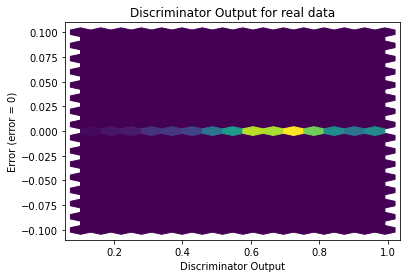

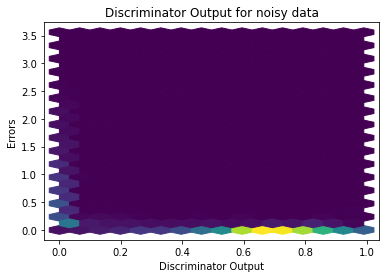

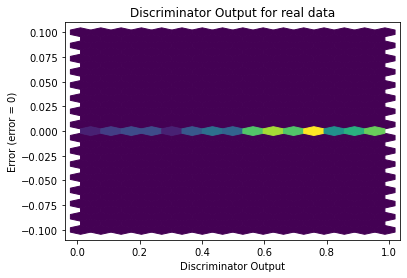

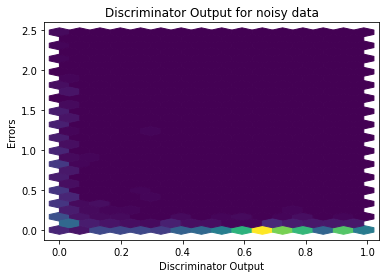

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


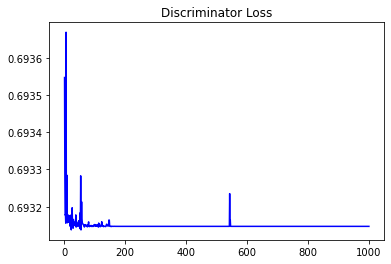

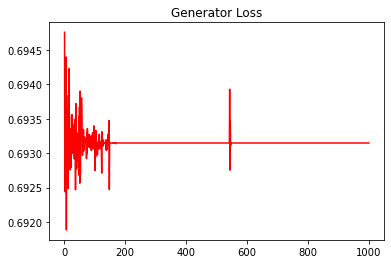

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.12925615312661612


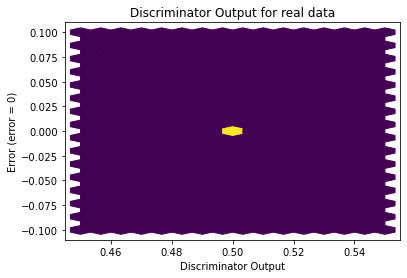

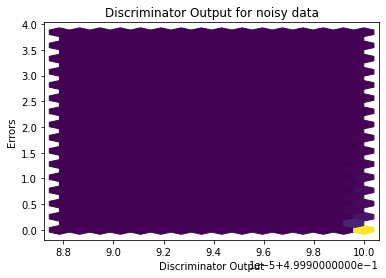

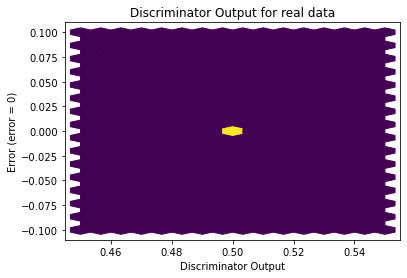

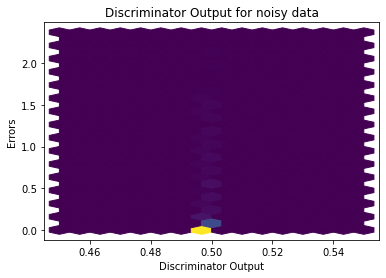

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


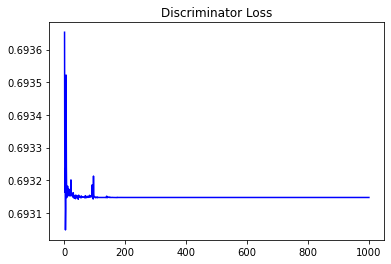

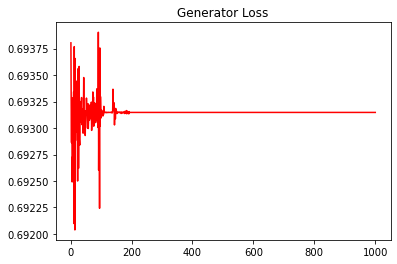

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.08347036426500629


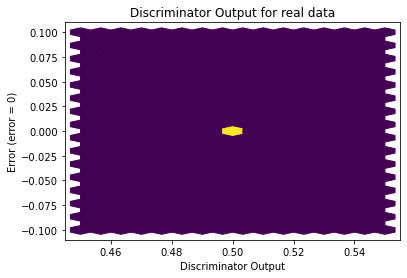

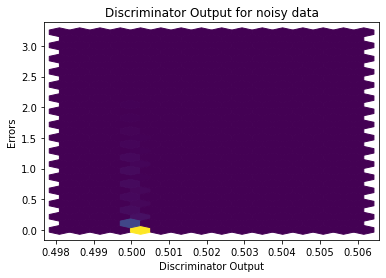

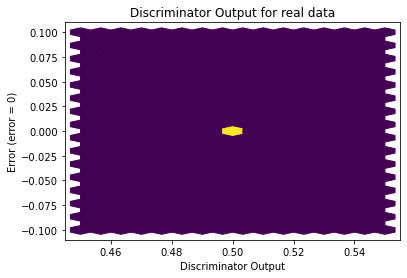

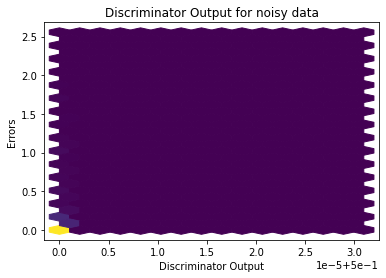

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0708]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0211]], requires_grad=True)
